In [16]:
%%capture
# update or install the necessary libraries
!pip install openai
!pip install --upgrade openai
!pip install --upgrade langchain
!pip install --upgrade python-dotenv
!pip install pillow


import os
import IPython
from dotenv import load_dotenv
import openai
from IPython.display import Audio

In [17]:
openai.api_key = os.getenv("OPENAI_API_KEY")
client = OpenAI(
    api_key=os.getenv("openai.api_key"))

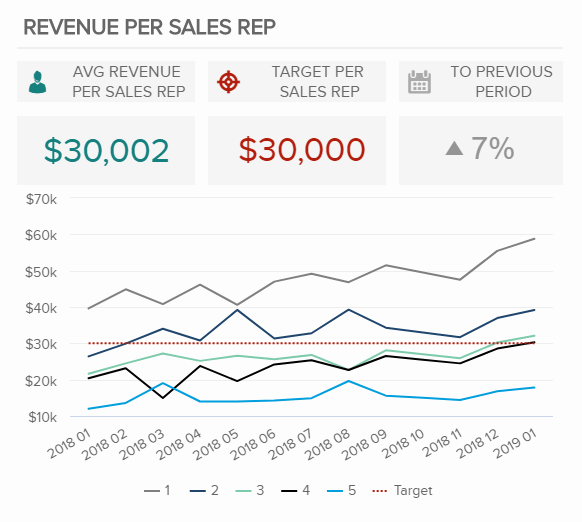

In [18]:
import urllib.request

from PIL import Image


image_path = '/Users/Ritesh/Downloads/sales-report.png'
#resp = urllib.request.urlretrieve("file:///Users/Ritesh/Downloads/ritesh-toronto-1.jpg")

img = Image.open(image_path)

display(img)

In [20]:
import base64
import requests
import json

# Function to encode the image
def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')

# Path to your image
image_path = "/Users/Ritesh/Downloads/sales-report.png"

# Getting the base64 string
base64_image = encode_image(image_path)

headers = {
  "Content-Type": "application/json",
  "Authorization": f"Bearer {openai.api_key}"
}

payload = {
  "model": "gpt-4-vision-preview",
  "messages": [
    {
      "role": "user",
      "content": [
        {
          "type": "text",
          "text": "What’s in this image?"
        },
        {
          "type": "image_url",
          "image_url": {
            "url": f"data:image/jpeg;base64,{base64_image}"
          }
        }
      ]
    }
  ],
  "max_tokens": 300
}

response = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=payload)

# Check if the request was successful
if response.status_code == 200:
    response_data = response.json()  # Parse JSON response into a dictionary

    # Access 'choices' key
    if 'choices' in response_data:
        choices = response_data['choices']
        if choices and len(choices) > 0:
            content = choices[0].get('message', {}).get('content', '')
            print(content)
        else:
            print("No choices found in the response.")
    else:
        print("'choices' not found in the response.")
else:
    print("Failed to get a valid response", response.status_code)

text_to_speech = content

This image shows a dashboard component labeled "REVENUE PER SALES REP." The dashboard includes the following elements:

1. A title that reads "REVENUE PER SALES REP."
2. Three key indicators:
   a. The average revenue per sales rep, which is $30,002.
   b. The target revenue per sales rep, set at $30,000.
   c. The change relative to the previous period, indicated by an upward-facing arrow and labeled as a 7% increase.
3. A line chart with a horizontal time axis ranging from 2018 Q1 to 2019 Q1.
   - There are six lines representing different sales reps or sales metrics. Each line is labeled with a number from 1 to 5, and there's a dotted line representing the target revenue.
   - The target revenue line is fixed at the $30,000 mark across the time period.
   - Most lines show fluctuations over time, with one line (labeled "1") significantly above the target, while others are below or hovering around the target.
4. A color legend that associates colors with the number labels for each sa

In [21]:
speech_file_path =  "salesreport.mp3"
response = client.audio.speech.create(
  model="tts-1",
  voice="onyx",
  input=text_to_speech
)


In [22]:
response.stream_to_file(speech_file_path)
Audio(speech_file_path)